In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
#création de la matrice de transistion de markov 
mat = np.array([[5/6,1/12,1/12],[1/4,1/2,1/4],[1/4,0,3/4]])

In [98]:
#verification connexe (uniquement pour matrice carrées)
def isConnexe(mat):
    for i in range(mat.shape[0]):
        if mat[i][i] != 0 :
            pass
        else : 
            return False
    return True

In [99]:
#verification connexe (uniquement pour matrice carrées)
def isAperiodique(mat):
    for i in range(mat.shape[0]):
        if mat[i][i] != 0 :
            pass
        else : 
            return False
    return True

In [100]:
def isStockastique(mat):
    row_sum=0
    for i in range(mat.shape[0]):
        for j in range (mat.shape[1]):
            row_sum = row_sum + mat[i][j]
    if (row_sum == mat.shape[0]):
        return True
    else :
        return False

In [101]:
#verification que la matrice est stockastique
isStockastique(mat)

True

In [102]:
def findAbsState(mat):
    abs_state = []
    for i in range(mat.shape[0]):
            if mat[i][i] == 1:
                abs_state.append(i+1)
    return abs_state

In [103]:
findAbsState(mat)

[]

In [104]:
def checkAbsState(mat,indice):
    if indice in findAbsState(mat):
        return True
    else :
        return False

In [105]:
def simulation(P, pi0, t0, tf):
    # Simulation numerique d'une chaine de Markov en temps discret
    # P	    : matrice de transition
    # pi0	: vecteur stochastique initial (a l'instant t0)
    # t0	: instant initial (debut de la simulation)
    # tf	: instant final
    # pi	: matrice des valeurs successives du vecteur stochastique
    # t     : liste des instants (t0 <= t <= tf)

    t = np.arange(t0, tf + 1)
    # controles
    if P.shape[0] != P.shape[1] | P.shape[0] != pi0.len:
        print("dimensions incorrectes")
    elif not isStockastique(P):
        print("la matrice n est pas stochastique")

    # evolution du vecteur stochastique
    pi = np.array(np.zeros((len(t), P.shape[1])))
    pi[0] = pi0
    for i in range(1, len(t)):
        pi[i] = pi[i - 1].dot(P)
    plt.plot(t, pi)
    return t, pi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 array([[0.        , 0.        , 1.        ],
        [0.25      , 0.        , 0.75      ],
        [0.39583333, 0.02083333, 0.58333333],
        [0.48090278, 0.04340278, 0.47569444],
        [0.53052662, 0.06177662, 0.40769676],
        [0.55947386, 0.07509886, 0.36542728],
        [0.57635975, 0.08417225, 0.33946799],
        [0.58620986, 0.09011611, 0.32367404],
        [0.59195575, 0.09390887, 0.31413538],
        [0.59530752, 0.09628408, 0.3084084 ],
        [0.59726272, 0.097751  , 0.30498628],
        [0.59840325, 0.09864739, 0.30294935],
        [0.59906856, 0.09919063, 0.3017408 ],
        [0.59945666, 0.0995177 , 0.30102564],
        [0.59968305, 0.09971357, 0.30060338],
        [0.59981511, 0.09983037,

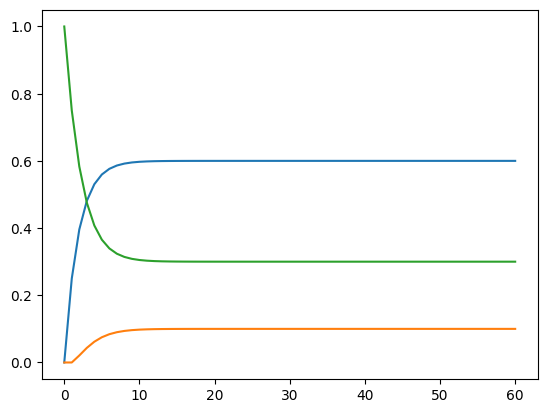

In [114]:
simulation(mat,[0,0,1],0,60)

In [143]:
def stationnaire(mat,pi):
    Id = np.eye(mat.shape[0])
    TP = mat.transpose
    Tpi = pi.transpose
    print(Id)
    print(TP)
    # m = Id - TP
    # m = np.cross(m,Tpi)

    return diag

In [144]:
stationnaire(mat,np.array([1,0,0]))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
<built-in method transpose of numpy.ndarray object at 0x0000025B22FD3DB0>


NameError: name 'diag' is not defined